<h1>制御対象の振舞い</h1>

Pythonによる制御工学入門 P94~  


<h2>時間応答</h2>

まずは代表的なシステムである１次遅れ系（First-Order Lag System）と２次遅れ系（Second-Order Lag System）を見ていきます。  

加えて、ステップ上の入力を加えたときの出力の振舞いである **ステップ応答 (Step Response)**を見ていきます。  

ステップ応答は以下の式の通りに定義されます。  

```math
u(t) = \left\{
    \begin{array}{ll}
        1 & (t \geq 0) \\
        0 & (t \lt 0)
    \end{array}
\right.
```

Pythonの```control```モジュールでは、ステップ応答は```y, t = step(sys, Td)```で計算できます。

<h3>１次遅れ系 First-Order Lag System</h3>

このノートブックで使う例として、台車の伝達関数モデルを使います。  

```math
P(s) = \frac{1}{Ms + \mu} = \frac{\frac{1}{\mu}}{1 + \frac{M}{\mu}s}
```

１次遅れ系には$K$をゲイン、$T$を時定数のパラメータを持ち、上記の台車系の伝達関数モデルに対して$K=\frac{1}{\mu}$、$T=\frac{M}{\mu}$と置くと、台車系の伝達関数モデルを適用した１次遅れ系は以下のように定義できます。  

```math
P(s) = \frac{K}{1+Ts}
```

上記の式を早速計算させてみます。

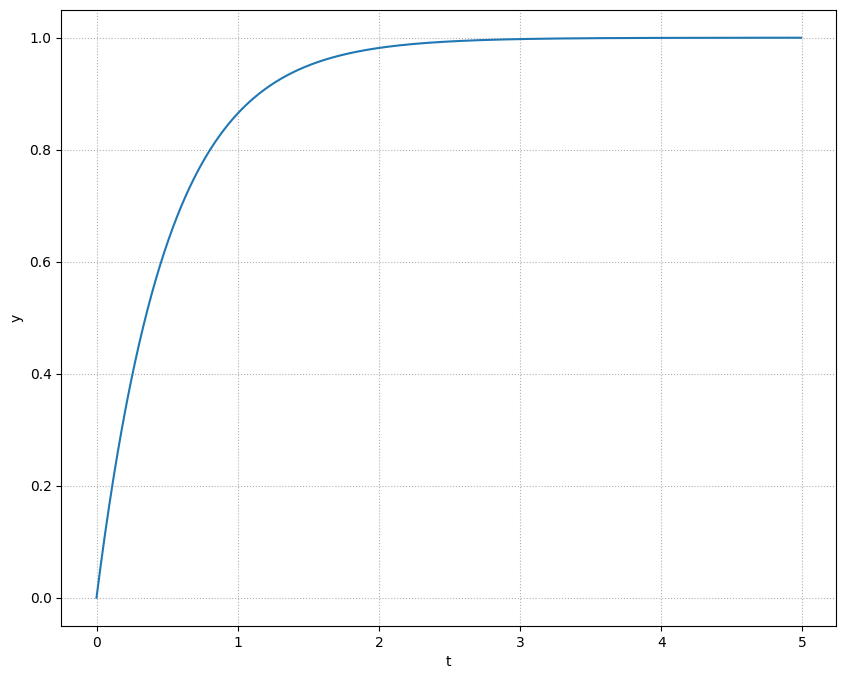

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, step

from plot import plot_set

# Define the transfer function for the system
T, K = 0.5, 1
P = tf([0, K], [T, 1])
y, t = step(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(t, y)
plot_set(ax, 't', 'y')